In [ ]:
# import des librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [27]:
data_init = pd.read_csv('https://github.dev/Azoulb/Projet-Data-science---ENSAE-2A-S1---/blob/d83fd6bc48c603f40316453b92ec99947d8c6540/CAC40.csv')
Date = data_init.index

data_init.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-01,3634.610107,3674.959961,3620.639893,3669.290039,3669.290039,176499800.0
1,2010-12-02,3695.409912,3754.820068,3650.030029,3747.040039,3747.040039,186177800.0
2,2010-12-03,3744.239990,3775.750000,3721.379883,3750.550049,3750.550049,151577200.0
3,2010-12-06,3758.580078,3763.399902,3723.159912,3749.229980,3749.229980,110872600.0
4,2010-12-07,3759.590088,3835.060059,3758.909912,3810.500000,3810.500000,143962000.0


In [28]:
data_init.shape

(3071, 7)

In [ ]:
## On crée une fonction qui cherche les NaN 

In [29]:
#partie ajouter pour classer les valeurs nulles des colonnes de differents tables avec leurs pourcentage
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total NaN Values', 'Percentage of NaN Values'])

In [30]:
missing_data(data_init)

,Total NaN Values,Percentage of NaN Values
Open,3,0.097688
High,3,0.097688
Low,3,0.097688
Close,3,0.097688
Adj Close,3,0.097688
Volume,3,0.097688
Date,0,0.000000


On remarque que le jeu de données est assez complet, on a que 3 NaN qu'on va aller regarder pour voir la méthode la plus judicieuse de les compléter avant de passer à la modélisation. On remarque aussi que les valeurs des dates correspondent aux jours de la semaine, hors week-end ce qui est attendu car les marchés sont fermés les week-ends. 


In [31]:
#permet de classer le fichier par une colonne spécifique et de mettre à jour l'index
data_ordered=data_init.sort_values(by=['Date'],ignore_index=True)

In [32]:
data_ordered.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-01,3634.610107,3674.959961,3620.639893,3669.290039,3669.290039,176499800.0
1,2010-12-02,3695.409912,3754.820068,3650.030029,3747.040039,3747.040039,186177800.0
2,2010-12-03,3744.239990,3775.750000,3721.379883,3750.550049,3750.550049,151577200.0
3,2010-12-06,3758.580078,3763.399902,3723.159912,3749.229980,3749.229980,110872600.0
4,2010-12-07,3759.590088,3835.060059,3758.909912,3810.500000,3810.500000,143962000.0


## **Recherche des NaN **

In [33]:
indices_open = np.where(data_ordered.Open.isnull())[0].tolist()
indices_open

[278, 870, 2317]

In [34]:
indices_close = np.where(data_ordered.Close.isnull())[0].tolist()
indices_close

[278, 870, 2317]

In [35]:
data_ordered[865:875]

,Date,Open,High,Low,Close,Adj Close,Volume
865,2014-04-24,4474.319824,4499.319824,4440.629883,4479.540039,4479.540039,143874900.0
866,2014-04-25,4459.169922,4473.479980,4431.379883,4443.629883,4443.629883,95383500.0
867,2014-04-28,4455.049805,4477.620117,4444.459961,4460.529785,4460.529785,90359100.0
868,2014-04-29,4463.600098,4504.140137,4449.939941,4497.680176,4497.680176,119189200.0
869,2014-04-30,4473.939941,4491.290039,4470.750000,4487.390137,4487.390137,137774800.0
870,2014-05-01,NaN,NaN,NaN,NaN,NaN,NaN
871,2014-05-02,4473.830078,4485.100098,4447.439941,4458.169922,4458.169922,117261200.0
872,2014-05-05,4453.520020,4467.370117,4400.910156,4462.689941,4462.689941,83750800.0
873,2014-05-06,4474.910156,4477.859863,4420.709961,4428.069824,4428.069824,125181200.0
874,2014-05-07,4414.339844,4453.220215,4402.779785,4446.439941,4446.439941,134882300.0


Le premier mai 2014 correspond à un jour ferié (donc possiblement à une fermeture des marchés) et ce n'est pas un jour de week-end

In [36]:
data_ordered[273:283]

,Date,Open,High,Low,Close,Adj Close,Volume
273,2011-12-23,3101.750000,3113.939941,3086.100098,3102.090088,3102.090088,57720200.0
274,2011-12-27,3111.139893,3131.500000,3098.139893,3103.110107,3103.110107,40091200.0
275,2011-12-28,3102.239990,3130.820068,3071.080078,3071.080078,3071.080078,60153000.0
276,2011-12-29,3081.169922,3127.560059,3064.689941,3127.560059,3127.560059,68204400.0
277,2011-12-30,3139.909912,3159.810059,3120.050049,3159.810059,3159.810059,61300800.0
278,2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN
279,2012-01-03,3231.429932,3246.739990,3193.629883,3245.399902,3245.399902,123415200.0
280,2012-01-04,3227.459961,3242.840088,3186.479980,3193.649902,3193.649902,114040800.0
281,2012-01-05,3197.159912,3200.149902,3136.750000,3144.909912,3144.909912,121161600.0
282,2012-01-06,3156.419922,3184.379883,3122.629883,3137.360107,3137.360107,104492800.0


Idem avec un Lundi 02 Janvier, le marché est aussi fermé hors week-end

In [37]:
data_ordered[2310:2323]

,Date,Open,High,Low,Close,Adj Close,Volume
2310,2019-12-16,5946.649902,6003.379883,5942.299805,5991.660156,5991.660156,77242800.0
2311,2019-12-17,5989.479980,5989.479980,5955.359863,5968.259766,5968.259766,84477400.0
2312,2019-12-18,5971.399902,5983.020020,5959.600098,5959.600098,5959.600098,80799300.0
2313,2019-12-19,5963.870117,5972.279785,5942.879883,5972.279785,5972.279785,72322800.0
2314,2019-12-20,5979.529785,6024.169922,5966.879883,6021.529785,6021.529785,151362500.0
2315,2019-12-23,6013.560059,6035.950195,6005.959961,6029.370117,6029.370117,46603900.0
2316,2019-12-24,6027.189941,6033.990234,6025.620117,6029.549805,6029.549805,12440900.0
2317,2019-12-25,NaN,NaN,NaN,NaN,NaN,NaN
2318,2019-12-27,6039.950195,6065.000000,6027.720215,6037.390137,6037.390137,47289800.0
2319,2019-12-30,6028.959961,6037.700195,5982.220215,5982.220215,5982.220215,40318700.0


idem avec une veille de Noel 

In [38]:
### On va corriger ça en attribuant les valeurs de la fermeture de la veille aux NaN
#fonction qui permet de mettre la valeur precedente dans un case vide
def add_before_value(data,ind_col,col):
    for j in ind_col:
        data.loc[j,col] =data.loc[j-1,col]
    return data

In [39]:
data_ordered_comp = add_before_value(data_ordered,indices_close,'Close')

In [40]:
data_ordered_comp.loc[2310:2323]

,Date,Open,High,Low,Close,Adj Close,Volume
2310,2019-12-16,5946.649902,6003.379883,5942.299805,5991.660156,5991.660156,77242800.0
2311,2019-12-17,5989.479980,5989.479980,5955.359863,5968.259766,5968.259766,84477400.0
2312,2019-12-18,5971.399902,5983.020020,5959.600098,5959.600098,5959.600098,80799300.0
2313,2019-12-19,5963.870117,5972.279785,5942.879883,5972.279785,5972.279785,72322800.0
2314,2019-12-20,5979.529785,6024.169922,5966.879883,6021.529785,6021.529785,151362500.0
2315,2019-12-23,6013.560059,6035.950195,6005.959961,6029.370117,6029.370117,46603900.0
2316,2019-12-24,6027.189941,6033.990234,6025.620117,6029.549805,6029.549805,12440900.0
2317,2019-12-25,NaN,NaN,NaN,6029.549805,NaN,NaN
2318,2019-12-27,6039.950195,6065.000000,6027.720215,6037.390137,6037.390137,47289800.0
2319,2019-12-30,6028.959961,6037.700195,5982.220215,5982.220215,5982.220215,40318700.0


In [41]:
#drop des colonnes non retenues par la stratégie
for col in data_ordered.columns:
    if np.where(data_ordered_comp[str(col)].isnull())[0].shape[0] != 0:
        data_ordered_comp = data_ordered_comp.drop(columns=col)
        print(col)

Open
High
Low
Adj Close
Volume


In [18]:
data_ordered_comp.head()

,Date,Close
0,2010-12-01,3669.290039
1,2010-12-02,3747.040039
2,2010-12-03,3750.550049
3,2010-12-06,3749.229980
4,2010-12-07,3810.500000


In [19]:
data_finale = pd.DataFrame (data_ordered_comp).set_index('Date')
data_finale.head()

,Close
Date,
2010-12-01,3669.290039
2010-12-02,3747.040039
2010-12-03,3750.550049
2010-12-06,3749.229980
2010-12-07,3810.500000


In [42]:
missing_data(data_finale)

,Total NaN Values,Percentage of NaN Values
Close,0,0.0


# Recherche des valeurs abbérantes par la méthode du box plot : 

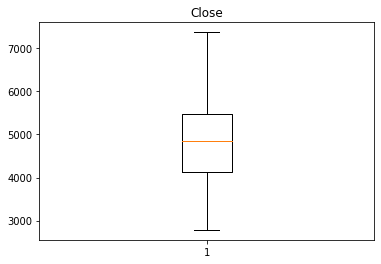

In [43]:
#recherche des valeurs aberrantes
fig1, ax1 = plt.subplots()
ax1.set_title('Close')
ax1.boxplot(data_finale['Close'])
plt.show()

Pas de valeurs abbérantes : ce qui est attendu vu qu'on est entrain de manipuler les valeurs d'un indice .. les performances individuelles de titres qui peuvent être abbérantes sont relativement lissées

# Visualisation du set de données

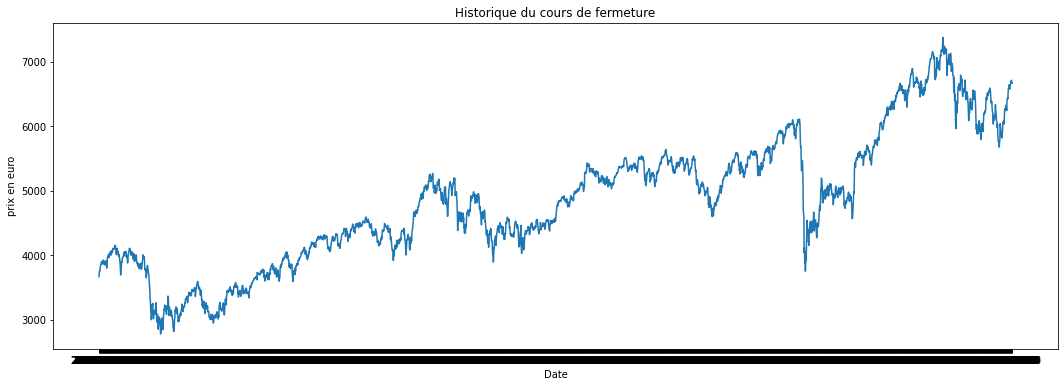

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
plt.title('Historique du cours de fermeture')
plt.plot(data_finale['Close'])
plt.xlabel('Date')
plt.ylabel('prix en euro')
plt.show()


#Partie modélisation


## On commence avec une modélisation via un réseau de neuronnes de type LSTM

In [48]:
# packages utiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


# Préparation de la data set - Normalisation
Pour les besoins du modèle (plus d'efficience et de rapidité) on va normaliser le jeu de données. 

In [49]:
sc = MinMaxScaler(feature_range=(0,1))
data_sc = sc.fit_transform(data_finale)

In [50]:
data_sc

array([[0.19318171],
       [0.21010342],
       [0.21086734],
       ...,
       [0.85550927],
       [0.84521918],
       [0.8460397 ]])

In [52]:
X_data=[]
y_data=[]
lb = 60
for i in range(len(data_sc)-60):
  X_data.append(data_sc[i:(i+lb),0])
  y_data.append(data_sc[i+lb,0])
X_data, y_data = np.array(X_data), np.array(y_data)
print(X_data)
print(y_data)


[[0.19318171 0.21010342 0.21086734 ... 0.27609916 0.26801376 0.26725631]
 [0.21010342 0.21086734 0.21058004 ... 0.26801376 0.26725631 0.28047592]
 [0.21086734 0.21058004 0.223915   ... 0.26725631 0.28047592 0.28917514]
 ...
 [0.73690057 0.72073201 0.72321088 ... 0.84354977 0.84824216 0.8543862 ]
 [0.72073201 0.72321088 0.723496   ... 0.84824216 0.8543862  0.85550927]
 [0.72321088 0.723496   0.7278445  ... 0.8543862  0.85550927 0.84521918]]
[0.28047592 0.28917514 0.27977294 ... 0.85550927 0.84521918 0.8460397 ]


In [53]:
# faire un reshapping (car on a un array 2D et pour le réseau de neuronnes on a besoin d'un array 3D)
X_data=np.reshape(X_data,(X_data.shape[0],X_data.shape[1],1))
X_data.shape

(3011, 60, 1)

In [54]:
# diviser les données en donnés d'entrainement et données de test, avec 70% pour l'entrainement et 30% pour le test
def split_data(dataset, split_fraction = 0.7):
    l = len(dataset)
    l_train = int(l * split_fraction)
    l_test = int((l - l_train))
    train_data = dataset[0:l_train]
    test_data = dataset[l_train:l]
    return train_data,test_data 

In [55]:
X_train, X_test = split_data(X_data)
y_train, y_test = split_data(y_data)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2107, 60, 1) (904, 60, 1)
(2107,) (904,)


## Modélisation du réseau de neuronnes RNN 

In [56]:
## Construction du RNN

model = Sequential()
model.add(LSTM(units=50, return_sequences = True, input_shape = (X_train.shape[1],1))) ## pour pouvoir rajouter des couches LSTM

model.add(LSTM(units=50, return_sequences = True))


model.add(LSTM(units=50))


# Ajouter la couche de sortie 
model.add(Dense(units=1))

model.compile(optimizer = 'adam', loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [57]:
#fitting du model
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
66/66 [==============================] - 12s 91ms/step - loss: 0.0095
Epoch 2/100
66/66 [==============================] - 6s 90ms/step - loss: 8.5419e-04
Epoch 3/100
66/66 [==============================] - 6s 89ms/step - loss: 8.3343e-04
Epoch 4/100
66/66 [==============================] - 6s 90ms/step - loss: 8.1965e-04
Epoch 5/100
66/66 [==============================] - 6s 89ms/step - loss: 7.4823e-04
Epoch 6/100
66/66 [==============================] - 6s 88ms/step - loss: 7.1152e-04
Epoch 7/100
66/66 [==============================] - 6s 90ms/step - loss: 6.8627e-04
Epoch 8/100
66/66 [==============================] - 6s 89ms/step - loss: 6.2746e-04
Epoch 9/100
66/66 [==============================] - 7s 113ms/step - loss: 6.1957e-04
Epoch 10/100
66/66 [==============================] - 6s 94ms/step - loss: 5.6368e-04
Epoch 11/100
66/66 [==============================] - 6s 91ms/step - loss: 5.6256e-04
Epoch 12/100
66/66 [==============================] - 6s 89ms/ste

In [58]:
y_pred = model.predict(X_test)

29/29 [==============================] - 6s 69ms/step


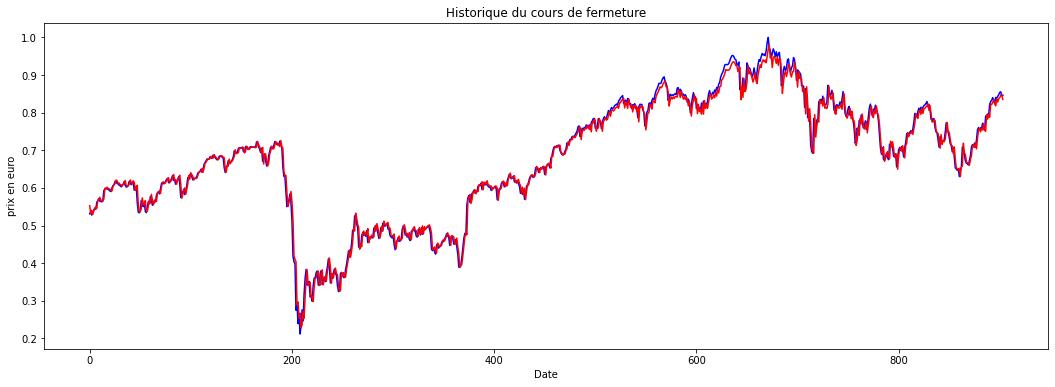

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
plt.title('Historique du cours de fermeture')
plt.plot(y_test, color = 'blue', label ='données de test')
plt.plot(y_pred, color = 'red', label ='données de prévion')
plt.xlabel('Date')
plt.ylabel('prix en euro')
plt.show()

*On* remarque que le modèle prédit assez bien le vours du cac 40 sur les données de test, l'apprentissage s'est alors bien effectué.
